<a href="https://colab.research.google.com/github/leyousse/PythonData/blob/main/TD3_python4data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install geopandas

     |████████████████████████████████| 972kB 4.6MB/s 
     |████████████████████████████████| 6.5MB 24.4MB/s 
     |████████████████████████████████| 14.8MB 303kB/s 


In [2]:
import sys 
path = fr"{str(sys.executable)}"
get_ipython().system('"{path}" -m pip install geopandas --user')

In [3]:
# GOOGLE SEARCH gis boundaries french departments
# https://www.data.gouv.fr/fr/datasets/r/ab21d892-aa39-466a-a3ed-dc25ff076b78
# Example from https://towardsdatascience.com/lets-make-a-map-using-geopandas-pandas-and-matplotlib-to-make-a-chloropleth-map-dddc31c1983d


import geopandas as gpd
map_df = gpd.read_file("departements-20140306-5m.shp")
map_df

,code_insee,nom,nuts3,wikipedia,geometry
0,01,Ain,FR711,b'fr:Ain (d\xe9partement)',"POLYGON ((5.25559 45.78459, 5.24813 45.78176, ..."
1,02,Aisne,FR221,b'fr:Aisne (d\xe9partement)',"POLYGON ((3.48175 48.86640, 3.48144 48.86635, ..."
2,03,Allier,FR721,b'fr:Allier (d\xe9partement)',"POLYGON ((2.38613 46.33196, 2.38597 46.33203, ..."
3,04,Alpes-de-Haute-Provence,FR821,fr:Alpes-de-Haute-Provence,"POLYGON ((6.66579 43.83120, 6.66739 43.83119, ..."
4,05,Hautes-Alpes,FR822,fr:Hautes-Alpes,"POLYGON ((6.24158 44.44686, 6.24210 44.44732, ..."
...,...,...,...,...,...
96,971,Guadeloupe,FR910,fr:Guadeloupe,"MULTIPOLYGON (((-61.61403 15.83955, -61.61399 ..."
97,972,Martinique,FR920,fr:Martinique,"MULTIPOLYGON (((-60.86880 14.39091, -60.86875 ..."
98,973,Guyane,FR930,fr:Guyane,"MULTIPOLYGON (((-52.58463 5.28309, -52.58348 5..."
99,974,b'La R\xe9union',FR940,b'fr:La R\xe9union',"MULTIPOLYGON (((55.77886 -21.36291, 55.77889 -..."


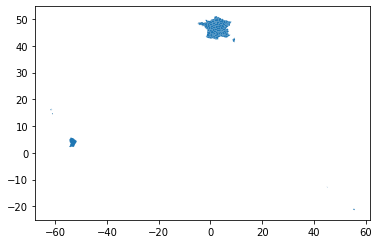

In [4]:
import matplotlib as plt
%matplotlib inline
map_df.plot()

In [5]:
map_df[map_df.code_insee.str.contains("\d\d\d")]

,code_insee,nom,nuts3,wikipedia,geometry
96,971,Guadeloupe,FR910,fr:Guadeloupe,"MULTIPOLYGON (((-61.61403 15.83955, -61.61399 ..."
97,972,Martinique,FR920,fr:Martinique,"MULTIPOLYGON (((-60.86880 14.39091, -60.86875 ..."
98,973,Guyane,FR930,fr:Guyane,"MULTIPOLYGON (((-52.58463 5.28309, -52.58348 5..."
99,974,b'La R\xe9union',FR940,b'fr:La R\xe9union',"MULTIPOLYGON (((55.77886 -21.36291, 55.77889 -..."
100,976,Mayotte,None,fr:Mayotte,"MULTIPOLYGON (((45.13667 -13.00398, 45.13690 -..."


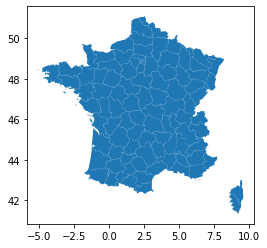

In [6]:
# LET'S SEPARATE DOM TOM FROM MAINLAND USING contains and REGEXP syntax
map_df=map_df[map_df.code_insee.str.contains("\d\d\d")==False]

# FILTER SYNTAX FOUND HERE : https://cmdlinetips.com/2018/02/how-to-subset-pandas-dataframe-based-on-values-of-a-column
map_df.plot()

In [7]:
import pandas as pd

In [8]:
prenoms= pd.read_csv("dpt2018.csv",sep=";")
prenoms

,sexe,preusuel,annais,dpt,nombre
0,1,A,XXXX,XX,27
1,1,AADAM,XXXX,XX,27
2,1,AADEL,XXXX,XX,55
3,1,AADIL,1983,84,3
4,1,AADIL,1992,92,3
...,...,...,...,...,...
3624989,2,ÉYA,2014,69,3
3624990,2,ÉYA,XXXX,XX,23
3624991,2,ÏNAYA,XXXX,XX,21
3624992,2,ÖZGE,XXXX,XX,30


In [9]:
dpt_sum=prenoms.groupby("dpt").nombre.sum()
dpt_sum

dpt
01      437904
02      842940
03      498369
04      105739
05      126071
        ...   
971     640654
972     637827
973     169185
974    1192007
XX     8261688
Name: nombre, Length: 100, dtype: int64

In [10]:
type(dpt_sum)

pandas.core.series.Series

In [11]:
# We want a dataframe to do the merging
dpt_sum=dpt_sum.reset_index()
dpt_sum

,dpt,nombre
0,01,437904
1,02,842940
2,03,498369
3,04,105739
4,05,126071
...,...,...
95,971,640654
96,972,637827
97,973,169185
98,974,1192007


In [12]:
type(dpt_sum)

pandas.core.frame.DataFrame

In [13]:
# Let's create a new department column with the same name than the column in our shape file
dpt_sum["code_insee"]=dpt_sum.dpt
dpt_sum

,dpt,nombre,code_insee
0,01,437904,01
1,02,842940,02
2,03,498369,03
3,04,105739,04
4,05,126071,05
...,...,...,...
95,971,640654,971
96,972,637827,972
97,973,169185,973
98,974,1192007,974


In [14]:
# NOW LET'S MAKE THE MERGE
merged = map_df.merge(dpt_sum, on='code_insee')
merged.head()
merged

,code_insee,nom,nuts3,wikipedia,geometry,dpt,nombre
0,01,Ain,FR711,b'fr:Ain (d\xe9partement)',"POLYGON ((5.25559 45.78459, 5.24813 45.78176, ...",01,437904
1,02,Aisne,FR221,b'fr:Aisne (d\xe9partement)',"POLYGON ((3.48175 48.86640, 3.48144 48.86635, ...",02,842940
2,03,Allier,FR721,b'fr:Allier (d\xe9partement)',"POLYGON ((2.38613 46.33196, 2.38597 46.33203, ...",03,498369
3,04,Alpes-de-Haute-Provence,FR821,fr:Alpes-de-Haute-Provence,"POLYGON ((6.66579 43.83120, 6.66739 43.83119, ...",04,105739
4,05,Hautes-Alpes,FR822,fr:Hautes-Alpes,"POLYGON ((6.24158 44.44686, 6.24210 44.44732, ...",05,126071
...,...,...,...,...,...,...,...
89,91,Essonne,FR104,b'fr:Essonne (d\xe9partement)',"POLYGON ((2.39233 48.33593, 2.39382 48.33444, ...",91,572350
90,92,Hauts-de-Seine,FR105,fr:Hauts-de-Seine,"POLYGON ((2.31993 48.77075, 2.31786 48.76867, ...",92,1153065
91,93,Seine-Saint-Denis,FR106,fr:Seine-Saint-Denis,"POLYGON ((2.41899 48.84939, 2.41636 48.84924, ...",93,975846
92,94,Val-de-Marne,FR107,fr:Val-de-Marne,"POLYGON ((2.41450 48.71780, 2.41320 48.71868, ...",94,806129


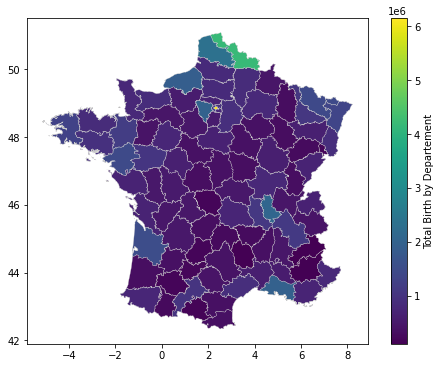

In [15]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize=(8, 6))

merged.plot(column="nombre",   ax=ax, linewidth=0.3,edgecolor="0.8",legend=True,legend_kwds
            ={"label": "Total Birth by Departement"})

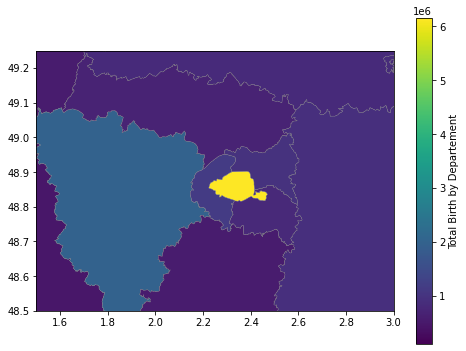

In [16]:
# LET's ZOOM IN AND ADD A LEGEND
fig, ax = plt.subplots(1, figsize=(8, 6))
plt.axis([1.5,3,48.5,49.25])

merged.plot(column="nombre", ax=ax , linewidth=0.3, edgecolor="0.5", legend=True, legend_kwds
            ={"label": "Total Birth by Departement"})

EXERCICES

- Display a choropleth map with Boys/girls total births disparity.
you must ask yourself what is boys / girls disparity ?
you must make sure your data is weighted:
if you use boys / girls ratio, you don't need to weight your data, because this ratio can be compared among all departement.
if you use boys - girls, you should then weight it using total births in the departement, and say for instance : difference between boys and girls births for 1000 births. if you don't do this weighting, your output will be meaningless, because it will mainly express the number of total births of the department.
- Display a choropleth map with number of girls named Emma born in 2018
- The same but weighted
( for instance nb of Emma births per thousand births in the dpt OR use dpt population ratio/ total france population) using a dataset with 2018 population for every dpt. the file must contain a department column with the same data as the prenoms dpt column...

SUPERBONUS

choropleth map for the most innovant departements , population weighted what is innovation ?

choropleth map for the most trendsetting departements , population weighted what is trendsetting ? we could detect firstname that appear (or come again..) in one or a few departments only, and then grows in other departments.

## **Display a choropleth map with Boys/girls total births disparity**

In [17]:
prenoms

,sexe,preusuel,annais,dpt,nombre
0,1,A,XXXX,XX,27
1,1,AADAM,XXXX,XX,27
2,1,AADEL,XXXX,XX,55
3,1,AADIL,1983,84,3
4,1,AADIL,1992,92,3
...,...,...,...,...,...
3624989,2,ÉYA,2014,69,3
3624990,2,ÉYA,XXXX,XX,23
3624991,2,ÏNAYA,XXXX,XX,21
3624992,2,ÖZGE,XXXX,XX,30


In [18]:
dpt_sexe=prenoms.groupby(["dpt","sexe"]).sum()
dpt_sexe

nombre
dpt sexe         
01  1      222361
    2      215543
02  1      428461
    2      414479
03  1      253694
...           ...
973 2       77466
974 1      612562
    2      579445
XX  1     3684762
    2     4576926

[200 rows x 1 columns]

In [19]:
type(dpt_sexe)

pandas.core.frame.DataFrame

In [20]:
dpt_sexe.dtypes

nombre    int64
dtype: object

In [21]:
listeH = []
listeF = []
for x in dpt_sexe.itertuples(True,None) :
  #print(x)
  for y in x[0]:
    if x[0][1]==1 :
      listeH.append(x[1])
    elif x[0][1]==2 :
      listeF.append(x[1])


In [22]:
hommes = []
femmes = []
for i in listeH: 
    if i not in hommes: 
        hommes.append(i)
for i in listeF:
  if i not in femmes:
    femmes.append(i)

print(len(hommes))
print(len(femmes))

100
100


In [23]:
k=100
ratio_ = []
ratio_ = [hommes[n]/femmes[n] for n in range(k)]
ratio_ = [ 1 if ratio_[_]>=1 else 2 for _ in range(k) ]

In [24]:
ratio = pd.DataFrame()
ratio['masculin']=hommes
ratio['feminin']=femmes
ratio['dominant']=ratio_
ratio = ratio.reset_index()

In [25]:
ratio['masculin'][0]

222361

In [26]:
nombre = []
for i in range(100):
  nombre.append(ratio['masculin'][i]+ratio['feminin'][i])
nombre
ratio['nombre']=nombre
ratio

,index,masculin,feminin,dominant,nombre
0,0,222361,215543,1,437904
1,1,428461,414479,1,842940
2,2,253694,244675,1,498369
3,3,55230,50509,1,105739
4,4,65182,60889,1,126071
...,...,...,...,...,...
95,95,338105,302549,1,640654
96,96,333358,304469,1,637827
97,97,91719,77466,1,169185
98,98,612562,579445,1,1192007


In [27]:
dpt_sexe=prenoms.groupby("dpt").nombre.sum()
dpt_sexe=dpt_sexe.reset_index()
dpt_sexe

,dpt,nombre
0,01,437904
1,02,842940
2,03,498369
3,04,105739
4,05,126071
...,...,...
95,971,640654
96,972,637827
97,973,169185
98,974,1192007


In [28]:
join = dpt_sexe.merge(ratio)
join = join.rename(columns={'dpt': 'code_insee'})
join

,code_insee,nombre,index,masculin,feminin,dominant
0,01,437904,0,222361,215543,1
1,02,842940,1,428461,414479,1
2,03,498369,2,253694,244675,1
3,04,105739,3,55230,50509,1
4,05,126071,4,65182,60889,1
...,...,...,...,...,...,...
95,971,640654,95,338105,302549,1
96,972,637827,96,333358,304469,1
97,973,169185,97,91719,77466,1
98,974,1192007,98,612562,579445,1


In [29]:
merged_2 = map_df.merge(join, on='code_insee')
merged_2

,code_insee,nom,nuts3,wikipedia,geometry,nombre,index,masculin,feminin,dominant
0,01,Ain,FR711,b'fr:Ain (d\xe9partement)',"POLYGON ((5.25559 45.78459, 5.24813 45.78176, ...",437904,0,222361,215543,1
1,02,Aisne,FR221,b'fr:Aisne (d\xe9partement)',"POLYGON ((3.48175 48.86640, 3.48144 48.86635, ...",842940,1,428461,414479,1
2,03,Allier,FR721,b'fr:Allier (d\xe9partement)',"POLYGON ((2.38613 46.33196, 2.38597 46.33203, ...",498369,2,253694,244675,1
3,04,Alpes-de-Haute-Provence,FR821,fr:Alpes-de-Haute-Provence,"POLYGON ((6.66579 43.83120, 6.66739 43.83119, ...",105739,3,55230,50509,1
4,05,Hautes-Alpes,FR822,fr:Hautes-Alpes,"POLYGON ((6.24158 44.44686, 6.24210 44.44732, ...",126071,4,65182,60889,1
...,...,...,...,...,...,...,...,...,...,...
89,91,Essonne,FR104,b'fr:Essonne (d\xe9partement)',"POLYGON ((2.39233 48.33593, 2.39382 48.33444, ...",572350,90,298009,274341,1
90,92,Hauts-de-Seine,FR105,fr:Hauts-de-Seine,"POLYGON ((2.31993 48.77075, 2.31786 48.76867, ...",1153065,91,596821,556244,1
91,93,Seine-Saint-Denis,FR106,fr:Seine-Saint-Denis,"POLYGON ((2.41899 48.84939, 2.41636 48.84924, ...",975846,92,505717,470129,1
92,94,Val-de-Marne,FR107,fr:Val-de-Marne,"POLYGON ((2.41450 48.71780, 2.41320 48.71868, ...",806129,93,417460,388669,1


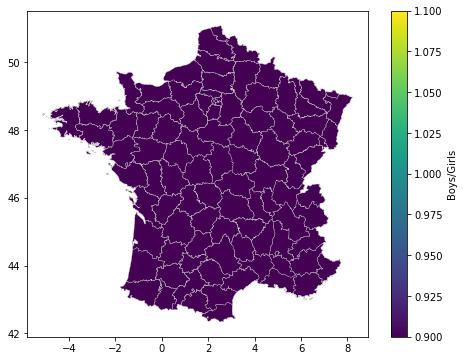

In [30]:
fig, ax = plt.subplots(1, figsize=(8, 6))

merged_2.plot(column="dominant",   ax=ax, linewidth=0.3,edgecolor="0.8",legend=True,legend_kwds
            ={"label": "Boys/Girls"})

# **Display a choropleth map with number of girls named Emma born in 2018**

In [31]:
prenoms

,sexe,preusuel,annais,dpt,nombre
0,1,A,XXXX,XX,27
1,1,AADAM,XXXX,XX,27
2,1,AADEL,XXXX,XX,55
3,1,AADIL,1983,84,3
4,1,AADIL,1992,92,3
...,...,...,...,...,...
3624989,2,ÉYA,2014,69,3
3624990,2,ÉYA,XXXX,XX,23
3624991,2,ÏNAYA,XXXX,XX,21
3624992,2,ÖZGE,XXXX,XX,30


In [32]:
emma=prenoms[(prenoms.preusuel=="EMMA")].sort_values(by='nombre')
emma

,sexe,preusuel,annais,dpt,nombre
427782,1,EMMA,1906,972,3
2292008,2,EMMA,1921,39,3
2292013,2,EMMA,1921,48,3
2292014,2,EMMA,1921,50,3
2292026,2,EMMA,1921,70,3
...,...,...,...,...,...
2294949,2,EMMA,2010,59,334
2293878,2,EMMA,1999,75,341
2293779,2,EMMA,1998,75,356
2293977,2,EMMA,2000,75,363


In [33]:
emma=emma[(prenoms.annais=="2018")].sort_values(by='nombre')
emma = emma.rename(columns={'dpt': 'code_insee'})
emma

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,sexe,preusuel,annais,code_insee,nombre
2295696,2,EMMA,2018,23,3
2295705,2,EMMA,2018,32,4
2295720,2,EMMA,2018,48,4
2295682,2,EMMA,2018,09,5
2295677,2,EMMA,2018,04,6
...,...,...,...,...,...
2295686,2,EMMA,2018,13,141
2295764,2,EMMA,2018,92,142
2295741,2,EMMA,2018,69,147
2295747,2,EMMA,2018,75,188


In [34]:
merged_3 = map_df.merge(emma, on='code_insee')
merged_3

,code_insee,nom,nuts3,wikipedia,geometry,sexe,preusuel,annais,nombre
0,01,Ain,FR711,b'fr:Ain (d\xe9partement)',"POLYGON ((5.25559 45.78459, 5.24813 45.78176, ...",2,EMMA,2018,37
1,02,Aisne,FR221,b'fr:Aisne (d\xe9partement)',"POLYGON ((3.48175 48.86640, 3.48144 48.86635, ...",2,EMMA,2018,38
2,03,Allier,FR721,b'fr:Allier (d\xe9partement)',"POLYGON ((2.38613 46.33196, 2.38597 46.33203, ...",2,EMMA,2018,28
3,04,Alpes-de-Haute-Provence,FR821,fr:Alpes-de-Haute-Provence,"POLYGON ((6.66579 43.83120, 6.66739 43.83119, ...",2,EMMA,2018,6
4,05,Hautes-Alpes,FR822,fr:Hautes-Alpes,"POLYGON ((6.24158 44.44686, 6.24210 44.44732, ...",2,EMMA,2018,10
...,...,...,...,...,...,...,...,...,...
88,91,Essonne,FR104,b'fr:Essonne (d\xe9partement)',"POLYGON ((2.39233 48.33593, 2.39382 48.33444, ...",2,EMMA,2018,75
89,92,Hauts-de-Seine,FR105,fr:Hauts-de-Seine,"POLYGON ((2.31993 48.77075, 2.31786 48.76867, ...",2,EMMA,2018,142
90,93,Seine-Saint-Denis,FR106,fr:Seine-Saint-Denis,"POLYGON ((2.41899 48.84939, 2.41636 48.84924, ...",2,EMMA,2018,48
91,94,Val-de-Marne,FR107,fr:Val-de-Marne,"POLYGON ((2.41450 48.71780, 2.41320 48.71868, ...",2,EMMA,2018,102


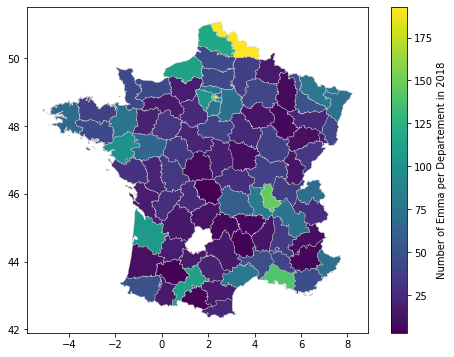

In [35]:
fig, ax = plt.subplots(1, figsize=(8, 6))

merged_3.plot(column="nombre",   ax=ax, linewidth=0.3,edgecolor="0.8",legend=True,legend_kwds
            ={"label": "Number of Emma per Departement in 2018"})

The same but weighted
( for instance nb of Emma births per thousand births in the dpt OR use dpt population ratio/ total france population) using a dataset with 2018 population for every dpt. the file must contain a department column with the same data as the prenoms dpt column...

In [36]:
emma=emma.sort_values(by='code_insee')
emma

,sexe,preusuel,annais,code_insee,nombre
2295674,2,EMMA,2018,01,37
2295675,2,EMMA,2018,02,38
2295676,2,EMMA,2018,03,28
2295677,2,EMMA,2018,04,6
2295678,2,EMMA,2018,05,10
...,...,...,...,...,...
2295767,2,EMMA,2018,95,79
2295768,2,EMMA,2018,971,17
2295769,2,EMMA,2018,972,11
2295770,2,EMMA,2018,973,11


In [37]:
emma_sortbydpt = emma.iloc[:,3:5]
emma_sortbydpt=emma_sortbydpt.rename(columns={'code_insee': 'dpt'})
emma_sortbydpt

,dpt,nombre
2295674,01,37
2295675,02,38
2295676,03,28
2295677,04,6
2295678,05,10
...,...,...
2295767,95,79
2295768,971,17
2295769,972,11
2295770,973,11


In [38]:
dpt_sexe=prenoms[prenoms.annais=="2018"].groupby(["dpt","annais","sexe"]).sum()
#dpt_sexe=dpt_sexe[(prenoms.annais=="2018")].sort_values(by='dpt')
dpt_sexe

nombre
dpt annais sexe        
01  2018   1       1354
           2       1139
02  2018   1       1761
           2       1535
03  2018   1        967
...                 ...
972 2018   2       1000
973 2018   1       2733
           2       2656
974 2018   1       5425
           2       5063

[198 rows x 1 columns]

In [39]:
table=pd.pivot_table(dpt_sexe,index=['dpt','annais'],columns=['sexe'])
#table=table.rename(columns={'dpt': 'code_insee'})
table

nombre      
sexe            1     2
dpt annais             
01  2018     1354  1139
02  2018     1761  1535
03  2018      967   863
04  2018      211   160
05  2018      327   269
...           ...   ...
95  2018     7827  7368
971 2018     1397  1164
972 2018     1205  1000
973 2018     2733  2656
974 2018     5425  5063

[99 rows x 2 columns]

In [40]:
mer = emma_sortbydpt.merge(table, on='dpt')
mer

/usr/local/lib/python3.6/dist-packages/pandas/core/reshape/merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


,dpt,nombre,"(nombre, 1)","(nombre, 2)"
0,01,37,1354,1139
1,02,38,1761,1535
2,03,28,967,863
3,04,6,211,160
4,05,10,327,269
...,...,...,...,...
93,95,79,7827,7368
94,971,17,1397,1164
95,972,11,1205,1000
96,973,11,2733,2656


In [41]:
emma_ratio = []
for i in mer.itertuples(True,None):
  emma_ratio.append(round((i[2]/i[4])*1000))
emma_ratio

[32,
 25,
 32,
 38,
 37,
 16,
 22,
 33,
 21,
 17,
 23,
 22,
 14,
 19,
 28,
 34,
 12,
 37,
 20,
 21,
 20,
 26,
 36,
 22,
 19,
 21,
 18,
 22,
 24,
 22,
 17,
 29,
 15,
 16,
 16,
 27,
 16,
 16,
 28,
 18,
 28,
 25,
 30,
 15,
 16,
 22,
 85,
 19,
 32,
 19,
 20,
 29,
 20,
 24,
 18,
 22,
 31,
 14,
 17,
 21,
 21,
 26,
 20,
 42,
 18,
 15,
 16,
 13,
 61,
 28,
 18,
 18,
 17,
 10,
 18,
 15,
 16,
 28,
 25,
 22,
 30,
 16,
 15,
 18,
 26,
 24,
 29,
 29,
 20,
 14,
 14,
 5,
 14,
 11,
 15,
 11,
 4,
 8]

In [42]:
mer['emma_ratio']=emma_ratio
mer=mer.rename(columns={'dpt': 'code_insee'})
mer

,code_insee,nombre,"(nombre, 1)","(nombre, 2)",emma_ratio
0,01,37,1354,1139,32
1,02,38,1761,1535,25
2,03,28,967,863,32
3,04,6,211,160,38
4,05,10,327,269,37
...,...,...,...,...,...
93,95,79,7827,7368,11
94,971,17,1397,1164,15
95,972,11,1205,1000,11
96,973,11,2733,2656,4


In [43]:
merged_4 = map_df.merge(mer, on='code_insee')
merged_4

,code_insee,nom,nuts3,wikipedia,geometry,nombre,"(nombre, 1)","(nombre, 2)",emma_ratio
0,01,Ain,FR711,b'fr:Ain (d\xe9partement)',"POLYGON ((5.25559 45.78459, 5.24813 45.78176, ...",37,1354,1139,32
1,02,Aisne,FR221,b'fr:Aisne (d\xe9partement)',"POLYGON ((3.48175 48.86640, 3.48144 48.86635, ...",38,1761,1535,25
2,03,Allier,FR721,b'fr:Allier (d\xe9partement)',"POLYGON ((2.38613 46.33196, 2.38597 46.33203, ...",28,967,863,32
3,04,Alpes-de-Haute-Provence,FR821,fr:Alpes-de-Haute-Provence,"POLYGON ((6.66579 43.83120, 6.66739 43.83119, ...",6,211,160,38
4,05,Hautes-Alpes,FR822,fr:Hautes-Alpes,"POLYGON ((6.24158 44.44686, 6.24210 44.44732, ...",10,327,269,37
...,...,...,...,...,...,...,...,...,...
88,91,Essonne,FR104,b'fr:Essonne (d\xe9partement)',"POLYGON ((2.39233 48.33593, 2.39382 48.33444, ...",75,6013,5441,14
89,92,Hauts-de-Seine,FR105,fr:Hauts-de-Seine,"POLYGON ((2.31993 48.77075, 2.31786 48.76867, ...",142,11441,10127,14
90,93,Seine-Saint-Denis,FR106,fr:Seine-Saint-Denis,"POLYGON ((2.41899 48.84939, 2.41636 48.84924, ...",48,9931,9397,5
91,94,Val-de-Marne,FR107,fr:Val-de-Marne,"POLYGON ((2.41450 48.71780, 2.41320 48.71868, ...",102,8239,7236,14


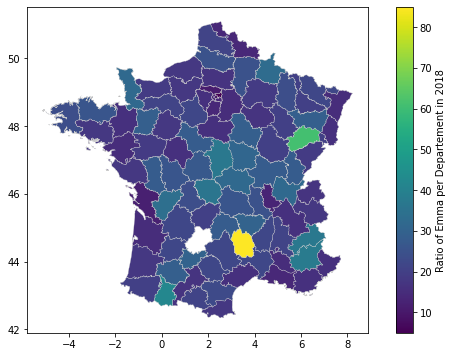

In [44]:
fig, ax = plt.subplots(1, figsize=(10, 6))

merged_4.plot(column="emma_ratio",   ax=ax, linewidth=0.3,edgecolor="0.8",legend=True,legend_kwds={"label": "Ratio of Emma per Departement in 2018"})

# **SUPERBONUS**

- choropleth map for the most innovant departements , population weighted what is innovation ?

- choropleth map for the most trendsetting departements , population weighted what is trendsetting ? we could detect firstname that appear (or come again..) in one or a few departments only, and then grows in other departments.

# BONUS 1: Choropleth map for the most innovant departements , population weighted what is innovation

**Innovant departement will be the departement with the most "original names". We will consider that original names are rare names**
Sum of "_PRENOMS_RARE" per / Sum of all prenoms per departement

In [78]:
prenoms

,sexe,preusuel,annais,dpt,nombre
0,1,A,XXXX,XX,27
1,1,AADAM,XXXX,XX,27
2,1,AADEL,XXXX,XX,55
3,1,AADIL,1983,84,3
4,1,AADIL,1992,92,3
...,...,...,...,...,...
3624989,2,ÉYA,2014,69,3
3624990,2,ÉYA,XXXX,XX,23
3624991,2,ÏNAYA,XXXX,XX,21
3624992,2,ÖZGE,XXXX,XX,30


In [79]:
PR=prenoms[(prenoms.preusuel=="_PRENOMS_RARES")].groupby(["dpt"]).sum()
prenoms_total= prenoms.groupby(["dpt"]).sum()
#PR
prenoms_total

,sexe,nombre
dpt,,
01,41914,437904
02,57809,842940
03,40040,498369
04,19863,105739
05,22363,126071
...,...,...
971,88151,640654
972,83154,637827
973,28831,169185


In [80]:
PR=PR.drop(['sexe'], axis=1)
prenoms_total=prenoms_total.drop(['sexe'],axis=1)
merged_bonus1 = PR.merge(prenoms_total, on='dpt')
merged_bonus1

,nombre_x,nombre_y
dpt,,
01,5561,437904
02,9484,842940
03,4805,498369
04,2021,105739
05,1820,126071
...,...,...
971,71011,640654
972,44005,637827
973,62051,169185


In [81]:
nombre = []
for i in range(100):
  nombre.append(merged_bonus1['nombre_x'][i]/merged_bonus1['nombre_y'][i])
nombre
merged_bonus1['nombre']=nombre
merged_bonus1

,nombre_x,nombre_y,nombre
dpt,,,
01,5561,437904,0.012699
02,9484,842940,0.011251
03,4805,498369,0.009641
04,2021,105739,0.019113
05,1820,126071,0.014436
...,...,...,...
971,71011,640654,0.110841
972,44005,637827,0.068992
973,62051,169185,0.366764


In [83]:
merged_bonus1['code_insee']=merged_bonus1.index
merged_bonus1 = map_df.merge(merged_bonus1, on='code_insee')
merged_bonus1

,code_insee,nom,nuts3,wikipedia,geometry,nombre_x,nombre_y,nombre
0,01,Ain,FR711,b'fr:Ain (d\xe9partement)',"POLYGON ((5.25559 45.78459, 5.24813 45.78176, ...",5561,437904,0.012699
1,02,Aisne,FR221,b'fr:Aisne (d\xe9partement)',"POLYGON ((3.48175 48.86640, 3.48144 48.86635, ...",9484,842940,0.011251
2,03,Allier,FR721,b'fr:Allier (d\xe9partement)',"POLYGON ((2.38613 46.33196, 2.38597 46.33203, ...",4805,498369,0.009641
3,04,Alpes-de-Haute-Provence,FR821,fr:Alpes-de-Haute-Provence,"POLYGON ((6.66579 43.83120, 6.66739 43.83119, ...",2021,105739,0.019113
4,05,Hautes-Alpes,FR822,fr:Hautes-Alpes,"POLYGON ((6.24158 44.44686, 6.24210 44.44732, ...",1820,126071,0.014436
...,...,...,...,...,...,...,...,...
89,91,Essonne,FR104,b'fr:Essonne (d\xe9partement)',"POLYGON ((2.39233 48.33593, 2.39382 48.33444, ...",33556,572350,0.058628
90,92,Hauts-de-Seine,FR105,fr:Hauts-de-Seine,"POLYGON ((2.31993 48.77075, 2.31786 48.76867, ...",53137,1153065,0.046083
91,93,Seine-Saint-Denis,FR106,fr:Seine-Saint-Denis,"POLYGON ((2.41899 48.84939, 2.41636 48.84924, ...",83416,975846,0.085481
92,94,Val-de-Marne,FR107,fr:Val-de-Marne,"POLYGON ((2.41450 48.71780, 2.41320 48.71868, ...",47304,806129,0.058680


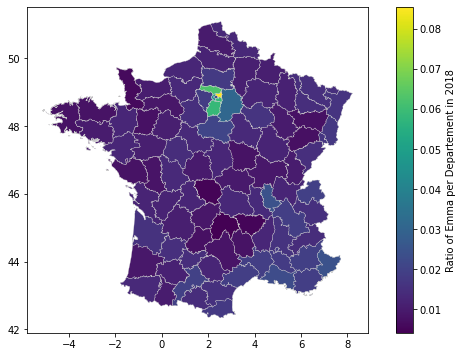

In [84]:
fig, ax = plt.subplots(1, figsize=(10, 6))

merged_bonus1.plot(column="nombre",   ax=ax, linewidth=0.3,edgecolor="0.8",legend=True,legend_kwds={"label": "Ratio of Emma per Departement in 2018"})

# BONUS 2: Choropleth map for the most trendsetting departements , population weighted what is trendsetting ? we could detect firstname that appear (or come again..) in one or a few departments only, and then grows in other departments.